<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9E%D1%80%D0%B8%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ориентация

# Orientation


В этом уроке мы научимся находить ориентацию градиента

In this lesson we will learn how to find the orientation of a gradient


Ориентация градиента используется для определения направления изменения интенсивности. Она даст нам угол, который мы можем использовать для количественной оценки направления изменения.


Gradient orientation is used to determine the direction of change in intensity. It will give us an angle that we can use to quantify the direction of change.

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_22.Orientation.zip
!unzip Lesson_22.Orientation.zip
%cd /content/Lesson_22.Orientation

--2022-02-01 18:50:31--  http://dataudt.ru/datasets/cv/Lesson_22.Orientation.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 600874 (587K) [application/zip]
Saving to: ‘Lesson_22.Orientation.zip’

Lesson_22.Orientati 100%[===================>] 586.79K   343KB/s    in 1.7s    

2022-02-01 18:50:35 (343 KB/s) - ‘Lesson_22.Orientation.zip’ saved [600874/600874]

Archive:  Lesson_22.Orientation.zip
  inflating: Lesson_22.Orientation/coins_01.png  
  inflating: Lesson_22.Orientation/coins_02.png  
  inflating: Lesson_22.Orientation/Orientation.py  
/content/Lesson_22.Orientation


In [2]:
# импортируем необходимые модули
# import the necessary packages
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

In [3]:
# создадим отдельный словарь с аргументами 
# create a separate dictionary with arguments 

args = {
# путь к входному изображению 
   # the path to the input image
  "image" : "coins_01.png",  
  # нижний угол ориентации
  # bottom corner orientation
  "lower-angle":175.0, 
  # верхний угол ориентации
  # top orientation corner
  "upper-angle":180.0 
}

Original


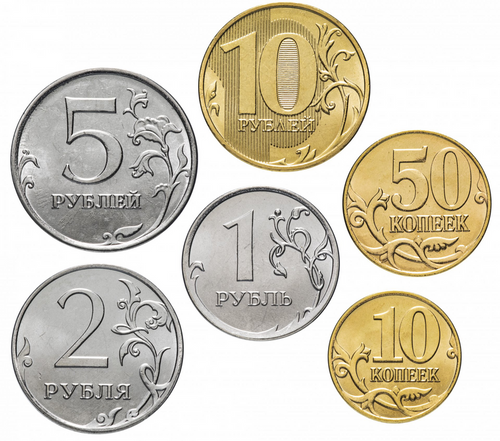

In [4]:
# загрузим изображение, преобразуем его в оттенки серого 
# и отобразим исходное изображение
# load the image, convert it to grayscale, and display the original
# image
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Original") 
cv2_imshow(image)

Mask


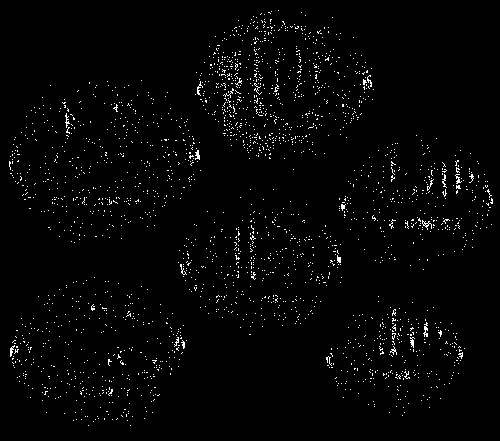

In [5]:
# вычисляем градиенты по осям X и Y соответственно
# compute gradients along the X and Y axis, respectively
gX = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
gY = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

# вычисляем величину градиента и ориентацию соответственно
# compute the gradient magnitude and orientation, respectively
mag = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

# найдём все пиксели, которые находятся в границах верхнего
# и нижнего угла
# find all pixels that are within the upper and low angle boundaries
idxs = np.where(orientation >= args["lower-angle"], orientation, -1)
idxs = np.where(orientation <= args["upper-angle"], idxs, -1)
mask = np.zeros(gray.shape, dtype="uint8")
mask[idxs > -1] = 255

# отобразим изображение
# show the images
print("Mask") 
cv2_imshow(mask)